In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm
import pickle

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data

In [2]:
T = 100
N = 40

### 1. Flat

In [36]:
set1 = []

for i in range(N):
    mean = np.random.random()*10 - 5
    set1.append([mean for j in range(T)])
    
set1 = np.array(set1)

set1 = pd.DataFrame(set1.T)
set1.columns = ['V' + str(i) for i in range(N)]
set1.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39
0,0.268741,1.548152,0.052521,3.747954,4.128272,0.953178,-1.829098,-1.206002,0.666211,1.122854,...,-1.515465,-1.601257,-3.498391,3.125505,-1.435683,4.234668,-0.274334,1.215848,-3.543447,-2.881493
1,0.268741,1.548152,0.052521,3.747954,4.128272,0.953178,-1.829098,-1.206002,0.666211,1.122854,...,-1.515465,-1.601257,-3.498391,3.125505,-1.435683,4.234668,-0.274334,1.215848,-3.543447,-2.881493
2,0.268741,1.548152,0.052521,3.747954,4.128272,0.953178,-1.829098,-1.206002,0.666211,1.122854,...,-1.515465,-1.601257,-3.498391,3.125505,-1.435683,4.234668,-0.274334,1.215848,-3.543447,-2.881493
3,0.268741,1.548152,0.052521,3.747954,4.128272,0.953178,-1.829098,-1.206002,0.666211,1.122854,...,-1.515465,-1.601257,-3.498391,3.125505,-1.435683,4.234668,-0.274334,1.215848,-3.543447,-2.881493
4,0.268741,1.548152,0.052521,3.747954,4.128272,0.953178,-1.829098,-1.206002,0.666211,1.122854,...,-1.515465,-1.601257,-3.498391,3.125505,-1.435683,4.234668,-0.274334,1.215848,-3.543447,-2.881493


### 2. Ressort

In [28]:
def compute_ressort(T, V_0, V_1, F, k, Vmin, Vmax, dt=1, noise=False, sigma=0):
    """ Modele de ressort
     - T: nombre de points
     - dt: pas de temps entre deux points
     - V_0, V_1: 2 premieres vitesses ??
     - F: force appliquée au ressort
     - Vmin, Vmax: si la vitesse devient trop faible ou trop importante on applique
       la force dans le sens inverse pour exciter ou ralentir le ressort"""
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if abs(V[t]) < Vmin:
            F = - F
        elif abs(V[t]) > Vmax:
            F= - F

    return V

def simu_ressort(N, F, k, Vmin, Vmax, sigma=1):

    # On tire N simulations aléatoires selon un jeu de paramètre fixé. 
    # Seuls varient le bruit et les vitesses intiales

    simus = []

    for i in range(N):
        V_0 = np.random.random()*10 - 5
        V_1 = np.random.random()*10 - 5  

        V = compute_ressort(T, V_0, V_1, F, k, Vmin, Vmax,
                            noise=True, sigma=sigma)
        simus.append(V)
        
    return np.array(simus)

In [39]:
set2 = simu_ressort(N, F=0., k=0.8, Vmin=0, Vmax=1, sigma=1)
set2 = pd.DataFrame(set2.T)
set2.columns = ['V' + str(i) for i in range(N)]
set2.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39
0,-1.821855,4.080868,1.105508,0.889640,-2.191652,-1.796299,1.450209,4.681730,4.364876,0.296892,...,-4.148133,-2.414223,-2.151393,-4.502520,2.406825,0.327675,0.860095,2.653241,2.334114,2.402316
1,-0.728031,-2.308185,3.342438,-0.464077,-3.245381,-0.368730,2.980037,2.317175,-3.172446,-2.201524,...,2.132372,-3.976807,-1.373888,1.041000,-3.261303,-1.674820,-2.356911,3.792078,2.855937,1.825857
2,0.723379,-7.439011,2.981675,-0.170481,-1.992041,1.063955,2.358527,-2.073620,-9.024759,-3.883028,...,6.272361,-2.490615,0.368699,5.055398,-6.119560,-4.032142,-3.936436,-1.357145,2.072361,-1.352253
3,1.519481,-7.533579,-0.749898,-1.050696,2.796673,3.565510,-1.427249,-6.116665,-8.510898,0.505466,...,5.441911,0.158960,0.858486,3.871751,-4.853769,-3.960894,-2.921601,-5.762131,-0.869624,-2.966273
4,0.392012,-1.810894,-4.050517,-0.718667,6.248739,2.691788,-4.106431,-4.513900,-2.320990,5.551891,...,0.437160,2.868984,1.507852,1.171197,-0.793954,-1.203579,1.590527,-6.974360,-4.290003,-1.505523


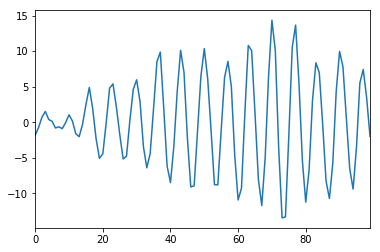

In [41]:
set2['V0'].plot()
plt.show()

## Distances

In [42]:
kolm_dist = compute_kolmogorov_dist(set1, set2)
print("Kolmogorov distance", kolm_dist)
wasser_dist = compute_wasserstein_distance(set1, set2)
print('Wassersteinr distance:', wasser_dist)

Kolmogorov distance 0.999809412558
Wassersteinr distance: 183.357875917


In [48]:
np.fft.fft(set2['V0'])

array([  1.08011448e+01 +0.00000000e+00j,
        -4.92829281e+00 -9.28218224e+00j,
         2.65592346e+00 +6.96850785e+00j,
         1.14477350e+01 -7.12805808e+00j,
         6.60900617e+00 +6.41572485e+00j,
         3.28541701e+00 +1.10431157e+01j,
         1.01285995e+01 +1.95376714e+00j,
        -1.23658576e+01 +8.52935511e+00j,
         9.91865799e+00 -1.60133907e+01j,
         1.39171834e+01 -1.80863820e+01j,
         1.91427696e+01 +4.70957875e+00j,
        -8.10016490e+00 +2.61376172e+01j,
         1.18747503e+01 +1.72632988e+01j,
         3.16012173e+01 +5.42747441e+01j,
         1.29837276e+02 +1.09312876e+02j,
        -3.97312170e+02 +2.76579358e+00j,
         1.88248428e+01 -9.35733927e+01j,
         3.24850942e+01 -2.01673984e+01j,
        -1.57640036e+01 +1.54089561e+01j,
         3.41027529e+00 -3.16428192e+01j,
        -7.89616861e+00 -2.70626512e+01j,
         5.59013547e+00 -1.55770189e+01j,
        -3.90612413e-02 -2.97725935e+00j,
        -4.64546759e+00 -5.3048622